# <img src="https://img.icons8.com/dusk/64/000000/artificial-intelligence.png" style="height:50px;display:inline"> EE 046202 - Technion - Unsupervised Learning & Data Analysis

* Formerly 046193 

#### Tal Daniel

## Tutorial 05 - Dimensionality Reduction - Principle Component Analysis (PCA)

### <img src="https://img.icons8.com/bubbles/100/000000/checklist.png" style="height:50px;display:inline"> Agenda

* Motivation and Introduction
* Principal Component Analyis (PCA) Recap
    * Algorithm
    * PCA for Compression
    * The Transpose Trick
    * Relation to SVD (Singular Value Decomposition)
* Kernels Motivation

In [1]:
# imports for the tutorial
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
%matplotlib notebook

## <img src="https://img.icons8.com/dusk/64/000000/confetti.png" style="height:50px;display:inline"> Motivation- Why Dimensionality Reduction?
* Discover Hidden Correlation/Topics - when we reduce dimensions, we sometimes discover correlation between features
    * For example, we can notice two features that occur commonly together
    * *Anomaly Detection*
* Remove Redundant and Noisy Features
    * Not all features are useful and sometimes harm the performance
* Interpretation & Visualiztion
    * For example, when we reduce n-dimensional features to 2 or 3, we can plot them and see the relationship with our eyes
* Easier Storage and Processing of the Data
    * Reduces time and space complexity
    * Yields a more optimized process
* Alleviates **The Curse of Dimensionality**
    * Fewer dimensions $\rightarrow$ less chance of *overfitting* $\rightarrow$ better generalization.

## <img src="https://img.icons8.com/dusk/64/000000/negative-dynamic.png" style="height:50px;display:inline"> Dimensionality Reduction
* Dimensionality reduction is the process of reducing the dimensionality of the feature space with consideration by obtaining a set of principal features. 
    * Dimensionality reduction can be further broken into feature selection and feature extraction.
* Dimensionality Reduction vs. **Feature Selection**
    * Differs from feature selection in 2 ways:
        1. Instead of choosing subset of features, it creates new features (dimensions) defined as functions over all features
        2. Does not consider class labels, just data points
* Main Idea:
    * Given data points in **d**-dimensional space
    * Project the data points into lower dimensional space while **preserving as much information as possible**
        * For example, find the best 2-D approximation to 3/4/104-D data
    * In particular, choose the projection that minimizes the squared error in reconstruction of the original data

## <img src="https://img.icons8.com/dusk/64/000000/zoom-to-extents.png" style="height:50px;display:inline"> Principal Component Analysis (PCA)
PCA is a method for reducing the dimensionality of data.

It uses simple matrix operations from linear algebra and statistics to calculate a projection of the original data into the same number or fewer dimensions.

We can define 2 goals PCA wishes to achieve:
1. Find linearly independent dimensions (or basis of views) which can losslessly represent the data points.
2. Those newly found dimensions should allow us to predict/reconstruct the original dimensions. **The reconstruction/projection error should be minimized.**

More formally, PCA finds a new set of dimensions (or a set of basis of views) such that all the dimensions are **orthogonal** (and hence linearly independent) and ranked according to the variance of data along them. It means that the more important principal axis occurs first (more important = more variance/more spread out data).

Recap of some basics:
* **Variance** - a measure of the variability. Mathematically, it is the average squared deviation from the mean score. We use the following formula to compute variance: $var(x) = \frac{1}{N}\sum_{i=1}^{N}(x_i - \mu_x)^2$ where $\mu_x$ is the mean.
* **Covaraince** - a measure of the extent to which corresponding elements from two sets of ordered data move in the same direction. We use the following formula to compute variance: $cov(x, y) = \frac{1}{N}\sum_{i=1}^{N}(x_i - \mu_x)(y_i-\mu_y)$. Replace $\frac{1}{N}$ with $\frac{1}{N-1}$ for the *unbiased* estimation.
* **Covariance matrix** - includes the variance of dimensions on the main diagonal and the rest is the covariance between dimensions. If we have $N$ data points (samples) with $d$ dimensions for each sample and $X$ is an $dxN$ matrix, then:
$Cov(X) = \frac{1}{N}(X-\mu_X)(X-\mu_X)^T$ (in PCA, we wish this matrix to be diagonal). We assume the data is centered, thus: $Cov(X) = \frac{1}{N}XX^T$. Replace $\frac{1}{N}$ with $\frac{1}{N-1}$ for the *unbiased* estimation.

* In the PCA case, multiplying by $\frac{1}{N-1}$ will not have much effect on the result, so in the following we will skip this step.

### <img src="https://img.icons8.com/dusk/64/000000/idea.png" style="height:50px;display:inline"> PCA Intuition 
<img src="./assets/tut_xi_pca_1.jpg" style="height:200px">

* Consider the variance along direction $v$ (projection) among all the orange points: $$var(v) = \sum_{\textit{orange points x}} ||(x - \overline{x})\cdot v||^2 $$
* What is the unit vector $v$ that **minimizes** the variance?
    * $\min_{v} (var(v)) = v_2$
* What is the unit vector $v$ that **maximizes** the variance?
    * $\min_{v} (var(v)) = v_1$

* $var(v) = var((x -\overline{x})^T\cdot v) = \sum_x ||(x -\overline{x})^T\cdot v ||^2 = \sum_x v^T(x -\overline{x})(x -\overline{x})^Tv = v^T\big[\sum_x (x -\overline{x})(x -\overline{x})^T \big]v = v^T A v$
* Formally: $$\max v^T Av$$  $$\textit{s.t   } ||v||= 1$$, where $A = \sum_x (x-\overline{x})(x-\overline{x})^T = (X - \overline{X})(X - \overline{X})^T $

* **Solution**:
    * $v_1$ is eigenvector of A with the **largest** eigenvalue
    * $v_2$ is eigenvector of A with the **smallest** eigenvalue

### <img src="https://img.icons8.com/dusk/64/000000/flow-chart.png" style="height:50px;display:inline"> PCA Algorithm
1. **Normalize/Standartize** (<a style="color:Tomato">if we use features of different scales, we may get misleading components</a>) and center the data. Given data $X \in \mathcal{R}^{m \times N}$, where $m$ is the number of features and $N$ is the number of samples, normalization: $$ \tilde{X} = X - \overline{X} $$ Standartization: $$ \tilde{X} = \frac{X - \overline{X}}{\overline{\sigma}_x} $$ Where $\overline{\sigma}_x$ is the empirical standard deviation (the square root of the empirical variance).
2. Calculate the empirical covariance matrix $X$ of data points: $$ P = \tilde{X}\tilde{X}^T \in \mathcal{R}^{m \times m} $$ 
    * Note that it is usually better to normalize: $$ P = \frac{1}{N-1} \tilde{X}\tilde{X}^T $$
3. Calculate eigenvectors and corresponding eigenvalues.
4. Sort the eigenvectors according to their eigenvalues in decreasing order.
5. Choose first $k$ largest eigenvectors and that will be the new $k$ dimensions.
6. Transform the original $d$ dimensional data points into $k$ dimensions.

### <img src="https://img.icons8.com/dusk/64/000000/classroom.png" style="height:50px;display:inline"> Example - PCA on Breast Cancer Dataset

#### <img src="https://img.icons8.com/nolan/64/000000/treatment-plan.png" style="height:30px;display:inline" /> The Breast Cancer Wisconsin (Diagnostic) Data Set

This dataset contains features of breast cancer and classify them to benign/malignant.
Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.

* We will take the first 3 features, and reduce the dimensionality to 2 using PCA. 

In [2]:
# load the data
dataset = pd.read_csv('./datasets/cancer_dataset.csv')
# print the number of rows in the data set
number_of_rows = len(dataset)
print('Number of rows in the dataset: {}'.format(number_of_rows))
## Show a sample 10 rows
dataset.sample(10)

Number of rows in the dataset: 569


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
531,91903901,B,11.67,20.02,75.21,416.2,0.10160,0.09453,0.04200,0.02157,...,28.81,87.00,550.6,0.15500,0.29640,0.2758,0.08120,0.3206,0.08950,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.25750,0.6638,0.17300,NaN
260,887549,M,20.31,27.06,132.90,1288.0,0.10000,0.10880,0.15190,0.09333,...,39.16,162.30,1844.0,0.15220,0.29450,0.3788,0.16970,0.3151,0.07999,NaN
473,9113846,B,12.27,29.97,77.42,465.4,0.07699,0.03398,0.00000,0.00000,...,38.05,85.08,558.9,0.09422,0.05213,0.0000,0.00000,0.2409,0.06743,NaN
497,914580,B,12.47,17.31,80.45,480.1,0.08928,0.07630,0.03609,0.02369,...,24.34,92.82,607.3,0.12760,0.25060,0.2028,0.10530,0.3035,0.07661,NaN
535,919555,M,20.55,20.86,137.80,1308.0,0.10460,0.17390,0.20850,0.13220,...,25.48,160.20,1809.0,0.12680,0.31350,0.4433,0.21480,0.3077,0.07569,NaN
20,8510653,B,13.08,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.03110,...,20.49,96.09,630.5,0.13120,0.27760,0.1890,0.07283,0.3184,0.08183,NaN
106,863031,B,11.64,18.33,75.17,412.5,0.11420,0.10170,0.07070,0.03485,...,29.26,85.51,521.7,0.16880,0.26600,0.2873,0.12180,0.2806,0.09097,NaN
87,86135502,M,19.02,24.59,122.00,1076.0,0.09029,0.12060,0.14680,0.08271,...,30.41,152.90,1623.0,0.12490,0.32060,0.5755,0.19560,0.3956,0.09288,NaN
249,884689,B,11.52,14.93,73.87,406.3,0.10130,0.07808,0.04328,0.02929,...,21.19,80.88,491.8,0.13890,0.15820,0.1804,0.09608,0.2664,0.07809,NaN


In [3]:
# take only the first 3 features
x = dataset[['radius_mean', 'texture_mean', 'perimeter_mean']].values
# standartize the data (centering and normalizing), features of different scale!
# note: you can also use scikit-learn's StandardScaler()
x -= x.mean(axis=0, keepdims=True)
x /= x.std(axis=0, keepdims=True)
# calculate the covariance matrix
A = x.T @ x  # x in [N x m]
# calculate eigenvalues and eigenvectors
# NOT ordered in decreasing order
d, v = np.linalg.eig(A)
# sort by decreasing order
v = v[:,np.argsort(-d)]
d = d[np.argsort(-d)]
print("eigenvalues:")
print(d.astype(np.float16))
# the reconstruction of x would be x ~ X @ V @ V.T
# take the 2 most dominant directions
print("projection - dimension reduction (3 to 2):")
x_proj = x @ v[:, :-1]
print(x_proj)

eigenvalues:
[1.24e+03 4.66e+02 1.21e+00]
projection - dimension reduction (3 to 2):
[[-0.80196001  2.54048135]
 [-2.18555934  1.23675759]
 [-2.23789966  0.38704729]
 ...
 [-1.65154304 -1.54971556]
 [-3.36804781 -1.19009381]
 [ 1.93933426 -2.07217819]]


In [4]:
def plot_pca():
    # plot
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(1, 1, 1, projection='3d')
#     ax.axis('equal')
    ax.set_xlabel('radius_mean',)
    ax.set_ylabel('texture_mean')
    ax.set_zlabel('perimeter_mean')
    ax.plot(x[:, 0], x[:, 1], x[:, 2], '.', markersize=3)
    ax.plot([0, v[0, 0]], [0, v[1, 0]], [0, v[2, 0]], 'r') # most dominant eigenvector
    ax.plot([0, v[0, 1]], [0, v[1, 1]], [0, v[2, 1]], 'g')
    ax.plot([0, v[0, 2]], [0, v[1, 2]], [0, v[2, 2]], 'b')

<IPython.core.display.Javascript object>


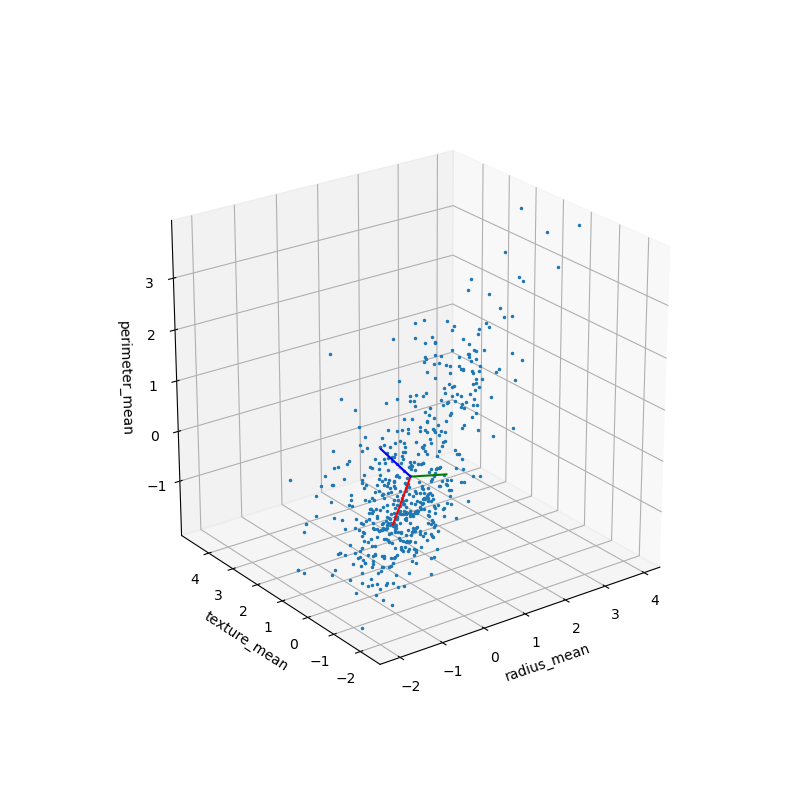

In [5]:
%matplotlib notebook
plot_pca()

In [6]:
# using scikit-learn
X = dataset[['radius_mean', 'texture_mean',
             'perimeter_mean', 'area_mean',
             'smoothness_mean', 'compactness_mean', 'concavity_mean']].values
y = dataset['diagnosis'].values == 'M'
pca = PCA(n_components=3)
X_3d = pca.fit_transform(X)

In [8]:
def plot_sk_pca():
    # plot
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(1, 1, 1, projection='3d')
    ax.scatter(X_3d[y,0], X_3d[y, 1], X_3d[y, 2], color='r', marker='*', label='Malignant')
    ax.scatter(X_3d[~y,0], X_3d[~y, 1], X_3d[~y, 2], color='b', marker='x', label='Benign')
    ax.grid()
    ax.legend()
    ax.set_title("3D PCA of the Breast Cancer Dataset")

<IPython.core.display.Javascript object>


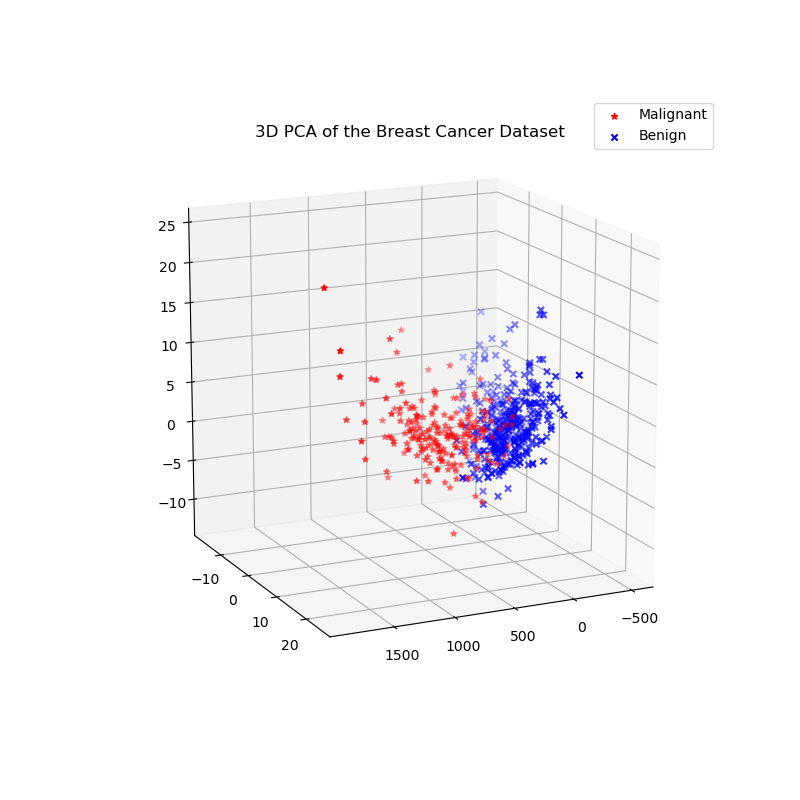

In [9]:
plot_sk_pca()

### <img src="https://img.icons8.com/color/96/000000/winrar.png" style="height:50px;display:inline"> PCA for Compression
* The projection matrix is a matrix composed of the data projected onto the top-K eigenvectors.
* To get a better understanding of the dimensionality reduction quality, we observe the trade-off between the compression and the reconstruction error.
    * The more compression (that is, lower dimension) the larger the reconstruction error and the representation quality is degraded (as our new features don't represent the original data faithfully).

* Measuring the normalized reconstruction error:
    * Denote the top-K eigenvector matrix: $W_k \in \mathcal{R}^{m \times k}$
    * The projection: $Z = XW_K \in \mathcal{R}^{n \times k}$
    * The reconstruction: $\tilde{X} = ZW_k^T = XW_kW_k^T \in \mathcal{R}^{N \times m}$
    * Measure the error by the **Matrix Norm: Frobenius Norm**: $$||M||_F = \sum_{ij} M_{ij}^2 \rightarrow ||A - B||_F = \sum_{ij} (A_{ij} - B_{ij})^2$$
    * The normalized reconstruction error: $$ err_k = \frac{||XW_kW_k^T - X||_F}{||X||_F} $$
* How to pick $k$?
    * As a rule of thumb we take the amount of eigenvectors that allows no more than 1% reconstruction error

In [10]:
X_normalized = X - X.mean(axis=0, keepdims=True)
X_norm = np.linalg.norm(X_normalized, ord='fro')
# calculate the covariance matrix
A = X_normalized.T @ X_normalized  # x in [N x m]
d, v = np.linalg.eig(A)
# sort by decreasing order
v = v[:,np.argsort(-d)]
d = d[np.argsort(-d)]
for k in range(1, X_normalized.shape[1] + 1):
    Z = X_normalized @ v[:,:k]
    err = np.square(np.linalg.norm(Z @ v[:,:k].T - X_normalized, ord='fro') / X_norm)
    print("number of eigenvectors (k): {}, reconstruction error: {}".format(k + 1, err))

number of eigenvectors (k): 2, reconstruction error: 0.00026239486787054983
number of eigenvectors (k): 3, reconstruction error: 0.0001204728931473307
number of eigenvectors (k): 4, reconstruction error: 4.2466242287813953e-07
number of eigenvectors (k): 5, reconstruction error: 1.0554210768301531e-08
number of eigenvectors (k): 6, reconstruction error: 2.7565644447137836e-09
number of eigenvectors (k): 7, reconstruction error: 6.737174895338786e-10
number of eigenvectors (k): 8, reconstruction error: 4.83758706698729e-29


In [11]:
def plot_pca_recon_error(X, v, d):
    k_s = list(range(X.shape[1]))
    X_norm = np.linalg.norm(X, ord='fro')
    errs = []
    for k in k_s:
        Z = X @ v[:,:k]
        err = np.square(np.linalg.norm(Z @ v[:,:k].T - X, ord='fro') / X_norm)
        errs.append(err)
    fig = plt.figure(figsize=(8, 5))
    ax = fig.add_subplot(111)
    ax.plot(k_s, errs)
    ax.grid()
    ax.set_xlabel("number of eigenvectors (K)")
    ax.set_ylabel("error")
    ax.set_title("reconstruction error vs. number of eigenvectors (K)")
    ax.set_ylim([0, 0.001])

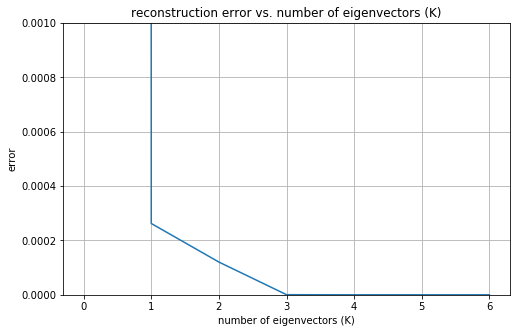

In [12]:
%matplotlib inline
plot_pca_recon_error(X_normalized, v, d)

### <img src="https://img.icons8.com/office/80/000000/fantasy.png" style="height:50px;display:inline"> The Tranpose Trick
* What happens when the number of features is very large and much larger than the number of samples, that is, $m >> N$?
    * Calculating the $m \times m$ covariance matrix is computationally expensive ($O(m^2N)$).
* **The Transpose Trick**: ($X \in \mathcal{R}^{m \times N}$)
    * Instead of calculating the eigenvalues and eigenvectors of $\frac{1}{N}XX^T$ we compute the eigenvalues and eigenvectors of $$ \frac{1}{m} X^TX $$
    * *Why???*
        * If $v$ is an eigenvector of $XX^T$, then: $$ XX^Tv = \lambda v $$
        * Left-multiplying by $X^T$, we get $$ X^TX (X^Tv) = \lambda (X^Tv) $$
            * $\rightarrow X^Tv$ is an **eigenvector** of $X^TX$ with **eigenvalue** $\lambda$. 
        * In order to compute $v$, which is really what we want:
            * Denote the eigenvector of $X^TX$ by $w$.
            * We get: $$ Xw =XX^Tv = \lambda v \rightarrow v = \lambda^{-1}Xw  $$

### <img src="https://img.icons8.com/dusk/64/000000/trust.png" style="height:50px;display:inline"> The Relationship Between PCA & SVD
* The PCA viewpoint requires that one compute the eigenvalues and eigenvectors of the covariance matrix, which is the product $XX^T$, where $X$ is the data matrix. Since the covariance matrix is symmetric, the matrix is diagonalizable, and the eigenvectors can be normalized such that they are orthonormal: $XX^T = WAW^T$

* On the other hand, applying SVD to the data matrix $X$ as follows: $X=U\Sigma V^T$, and attempting to construct the covariance matrix from this decomposition gives: $$XX^T = (U\Sigma V^T)(U \Sigma V^T)^T = U \Sigma^2 U^T $$ the last transition is due to $V$ being orthonormal ($VV^T = I$). Thus, the square roots of the eigenvalues of $XX^T$ are the singular values of $X$.
* Using the SVD to perform PCA makes much better sense numerically than forming the covariance matrix to begin with, since the formation of $XX^⊤$ can cause loss of precision. But performing SVD is slower.

### <img src="https://img.icons8.com/color/48/000000/critical-thinking.png" style="height:50px;display:inline"> PCA as Dimensionality Reduction Technique
* **Pro**: Optimal reconstruction error in Frobenius norm
* **Con**: Interpretability problem - features lose their previous meaning
    * A singular vector specifies a linear combination of all input columns or rows
    * PCA is **sensitive to outliers** since it is minimizing $l_2$ norms. The squaring of deviations from the outliers, they will dominate the total norm and therefore will drive the PCA components.
* **When will PCA work?**
    * PCA assumes **linear** realtionships among variables
    * Clouds of points in *p*-dimensional space has linear dimensions that can be effectively summarized by the principal axes
    * If the structure in the data is **non-linear** (the cloud of points twists and curves its way through *p*-dimensional space), the principal axes will not be an efficient and informative summary of the data.

## <img src="https://img.icons8.com/color/96/000000/the-earths-inner-core.png" style="height:50px;display:inline"> Kernels Motivation 
* The main shortcoming of PCA is that it is unable to capture nonlinear structures in the data.
* Consider the following example of linearly inseparatable 1-D set of exmaples and then extracting polynimial (second order) features:

In [13]:
def plot_kernel_example():
    x_1 = np.random.randint(0,6, size=(3,))
    x_2 = np.random.randint(8,14, size=(3,))
    x_3 = np.random.randint(20,25, size=(3,))

    x_1_p = x_1 ** 2
    x_2_p = x_2 ** 2
    x_3_p = x_3 ** 2

    x_class = np.linspace(0, 30, 400)
    y_class = 25 * x_class - 130

    fig = plt.figure(figsize=(8,5))
    ax_1 = fig.add_subplot(211)
    ax_1.scatter(x_1, np.zeros_like(x_1), marker='*', color='b')
    ax_1.scatter(x_2, np.zeros_like(x_2), marker='^', color='r')
    ax_1.scatter(x_3, np.zeros_like(x_3), marker='*', color='b')
    ax_1.grid()
    ax_2 = fig.add_subplot(212)
    ax_2.scatter(x_1, x_1_p, marker='*', color='b')
    ax_2.scatter(x_2, x_2_p, marker='^', color='r')
    ax_2.scatter(x_3, x_3_p, marker='*', color='b')
    ax_2.plot(x_class, y_class)
    ax_2.grid()

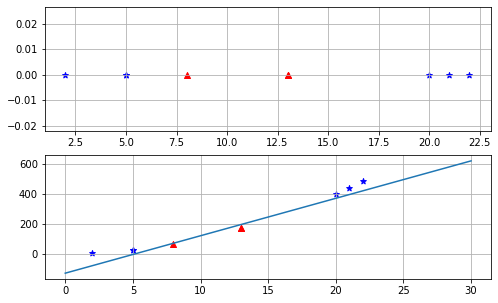

In [14]:
plot_kernel_example()

* Adding polynomial features is simple to implement and can work great with all sorts of ML algorithms.
* At a **low polynomial** degree it cannot deal with more complex datasets.
* At a **high polynomial** degree there are a lot of features, which makes the computation very slow.
    * Computation in the feature space can be costly because it is high dimensional (even go to infinity).
* **The Kernel Trick** comes to the rescue!
    * It makes it possible to get the same result as if you added many features (even in high dimension), **without actually adding them**!
        * So there is no computational disaster resulting from the large number of features.

### <img src="https://img.icons8.com/bubbles/50/000000/video-playlist.png" style="height:50px;display:inline"> Recommended Videos

#### <img src="https://img.icons8.com/cute-clipart/64/000000/warning-shield.png" style="height:30px;display:inline"> Warning!
* These videos do not replace the lectures and tutorials.
* Please use these to get a better understanding of the material, and not as an alternative to the written material.

#### Video By Subject

* PCA (1) - <a href="https://www.youtube.com/watch?v=FgakZw6K1QQ">StatQuest: Principal Component Analysis (PCA), Step-by-Step</a>
* PCA (2) - <a href="https://www.youtube.com/watch?v=TJdH6rPA-TI">Principal Component Analysis (PCA) - Computerphile</a>


## <img src="https://img.icons8.com/dusk/50/000000/prize.png" style="height:50px;display:inline"> Credits
* Icons from <a href="https://icons8.com/">Icon8.com</a> - https://icons8.com
* Datasets from <a href="https://www.kaggle.com/">Kaggle</a> - https://www.kaggle.com/